## Bibliotecas que serão utilizadas para a realização das atividades:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("Set3")
sns.set(rc={'figure.figsize':(10,8)})

# Atividade 1

## Olimpic Games

### Pre-processing

In [2]:
# olimpic = pd.read_csv("athlete_events.csv")
# olimpic.drop(columns=["ID", "Name", "Sex", "Age", "Height", "Weight",
#                       "Team", "Games", "Event"], inplace=True)

# olimpic = olimpic[olimpic["Year"] >= 2004]
# olimpic["Medal"].fillna("No medal", inplace=True)

# olimpic["Bronze"] = olimpic["Medal"] == "Bronze"
# olimpic["Silver"] = olimpic["Medal"] == "Silver"
# olimpic["Gold"] = olimpic["Medal"] == "Gold"
# olimpic["No medal"] = olimpic["Medal"] == "No medal"

# olimpic.to_csv("olimpic_alterado")

Nós salvamos o dataset em um dataset menor (com as colunas que usaríamos), afim de colocar no github e facilitar a execução em qualquer máquina.

In [3]:
olimpic = pd.read_csv("https://raw.githubusercontent.com/caiochacon/projeto_final_ICD/main/datasets/olimpic_alterado")
olimpic.drop("Unnamed: 0", axis=1, inplace=True)

* ol_sum = dataset dos jogos de verão
* ol_win = dataset dos jogos de inverno

In [4]:
ol_sum = olimpic[olimpic["Season"] == "Summer"]
ol_win = olimpic[olimpic["Season"] == "Winter"]

* ol_gr_sum = dataset groupby dos jogos de verão
* ol_gr_win = dataset groupby dos jogos de inverno

In [5]:
ol_gr_sum = ol_sum.groupby(["Year", "NOC"])
ol_gr_win = ol_win.groupby(["Year", "NOC"])

In [6]:
# Países que serão utilizados

countries = ["Brazil", "Argentina", "Paraguay", "Uruguay", "Venezuela"]
countries_NOC = ["BRA", "ARG", "PAR", "URU", "VEN"]
count_ = list(zip(countries, countries_NOC))
years = [2004, 2008, 2012, 2016]

### Calcular a média, soma e desvio padrão das medalhas por país/edição dos jogos

In [7]:
def dispersion_central_tendency(df, year, noc):
    dic = {"Mean": df.mean().loc[year, noc], 
           "Standard Deviation": df.std().loc[year, noc],
            "Sum": df.sum().loc[year, noc]}
    
    return pd.DataFrame(dic).T

In [8]:
for i in years:
    for j in countries_NOC: 
        print(f"Medals of {j} in {i}")
        print("-"*80)
        print(dispersion_central_tendency(ol_gr_sum, i, j))
        print("-"*80)

Medals of BRA in 2004
--------------------------------------------------------------------------------
                      Bronze     Silver       Gold    No medal
Mean                0.009434   0.059748   0.056604    0.874214
Standard Deviation  0.096822   0.237394   0.231448    0.332131
Sum                 3.000000  19.000000  18.000000  278.000000
--------------------------------------------------------------------------------
Medals of ARG in 2004
--------------------------------------------------------------------------------
                       Bronze  Silver       Gold    No medal
Mean                 0.117318     0.0   0.156425    0.726257
Standard Deviation   0.322702     0.0   0.364276    0.447129
Sum                 21.000000     0.0  28.000000  130.000000
--------------------------------------------------------------------------------
Medals of PAR in 2004
--------------------------------------------------------------------------------
                    Bronze     Si

## World Happiness Report

In [9]:
whr = pd.read_csv("https://raw.githubusercontent.com/caiochacon/projeto_final_ICD/main/datasets/world-happiness-report.csv")
whr.rename(columns = {"Log GDP per capita":"GDP"},inplace = True)

In [10]:
whr.head()

,Country name,year,Life Ladder,GDP,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


### Medidas de disperção e centralidade

In [11]:
whr.drop("year", axis=1).describe()

,Life Ladder,GDP,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


### Boxplot 

In [12]:
whr_mercosul = whr[whr["Country name"].isin(countries)]
whr_mercosul

,Country name,year,Life Ladder,GDP,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
37,Argentina,2006,6.313,9.942,0.938,66.82,0.733,-0.157,0.852,0.825,0.328
38,Argentina,2007,6.073,10.018,0.862,66.94,0.653,-0.141,0.881,0.828,0.279
39,Argentina,2008,5.961,10.048,0.892,67.06,0.678,-0.132,0.865,0.823,0.318
40,Argentina,2009,6.424,9.977,0.919,67.18,0.637,-0.130,0.885,0.864,0.237
41,Argentina,2010,6.441,10.066,0.927,67.30,0.730,-0.126,0.855,0.846,0.211
...,...,...,...,...,...,...,...,...,...,...,...
1889,Venezuela,2016,4.041,9.010,0.902,66.10,0.458,-0.155,0.890,0.688,0.392
1890,Venezuela,2017,5.071,9.073,0.896,66.30,0.636,-0.169,0.844,0.726,0.363
1891,Venezuela,2018,5.006,NaN,0.887,66.50,0.611,NaN,0.828,0.759,0.374
1892,Venezuela,2019,5.081,NaN,0.888,66.70,0.626,NaN,0.839,0.761,0.351


In [13]:
def plot_boxplot(col):
    ax = sns.boxplot(data=whr_mercosul, x="Country name", y=col)
    ax.set_title(f"The Mercosul boxplot of {col}")
    return ax

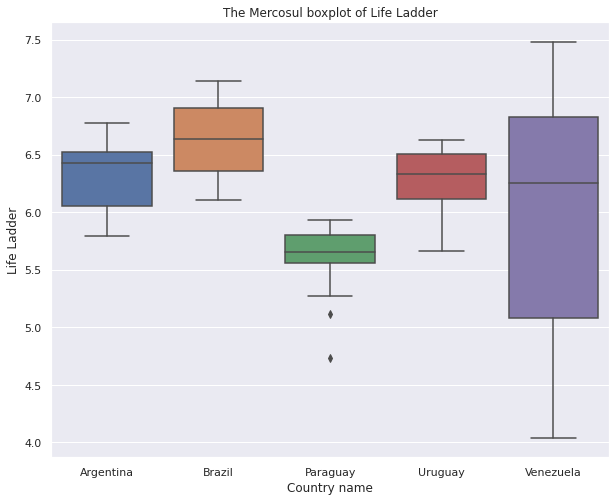

In [14]:
plot_boxplot("Life Ladder");

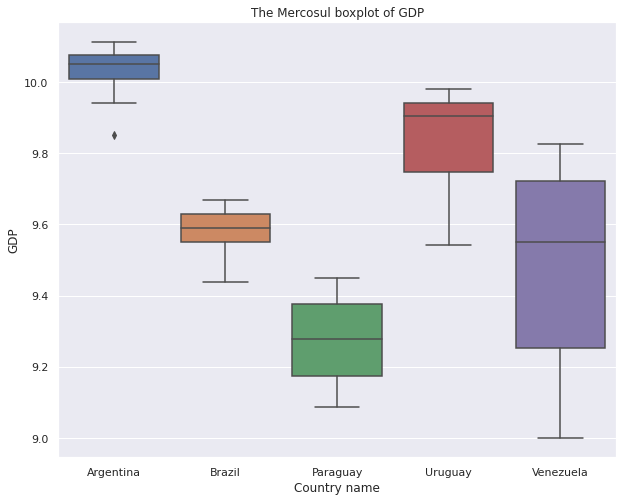

In [15]:
plot_boxplot("GDP");

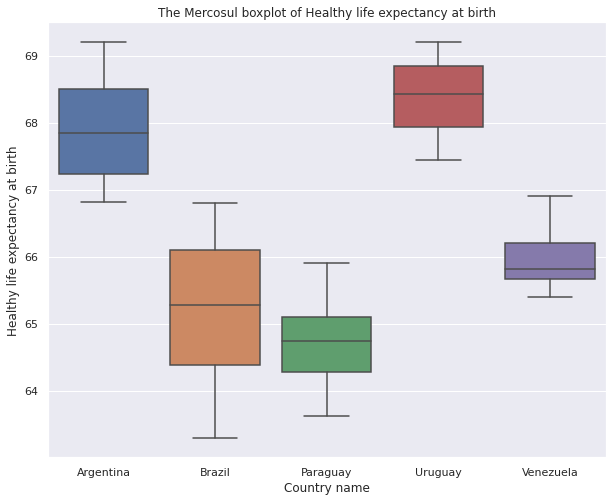

In [16]:
plot_boxplot("Healthy life expectancy at birth");

# Atividade 2
## Graficos criados:

* scatterplots relacionando algumas variáveis relevantes

* Grafico de colunas com numero de medalhas por país

* Grafico de linhas com crescimento de PIB com o decorrer do tempo

### Scatterplots:

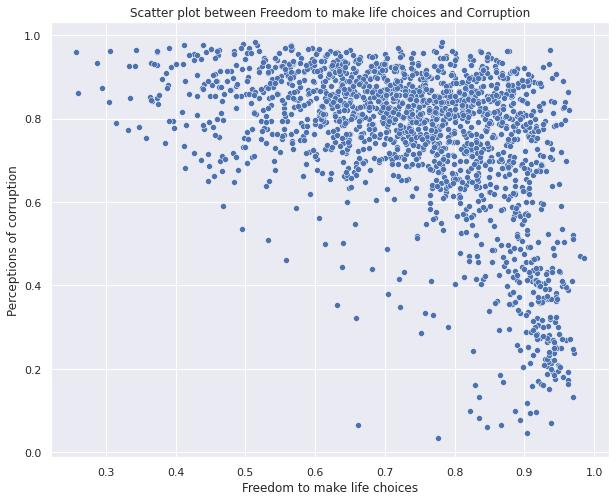

In [17]:
# Freedom life choices ; Corrupcao (Correlacao negativa)
ax = sns.scatterplot(data=whr,x="Freedom to make life choices",y="Perceptions of corruption");
ax.set_title("Scatter plot between Freedom to make life choices and Corruption");

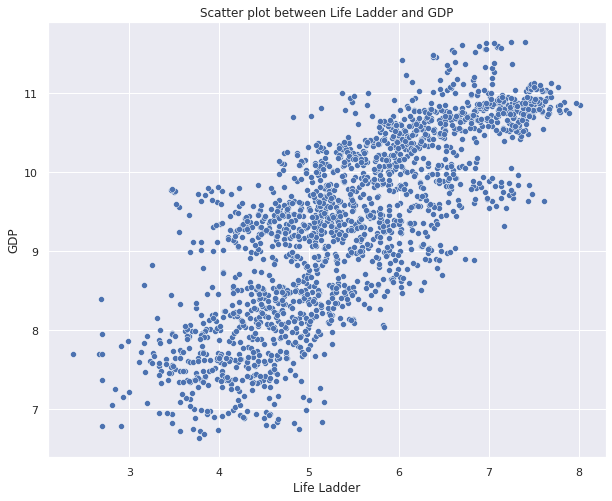

In [18]:
# Life ladder ; GDP (Correlcao positiva)
ax = sns.scatterplot(data=whr,x="Life Ladder",y="GDP");
ax.set_title("Scatter plot between Life Ladder and GDP");

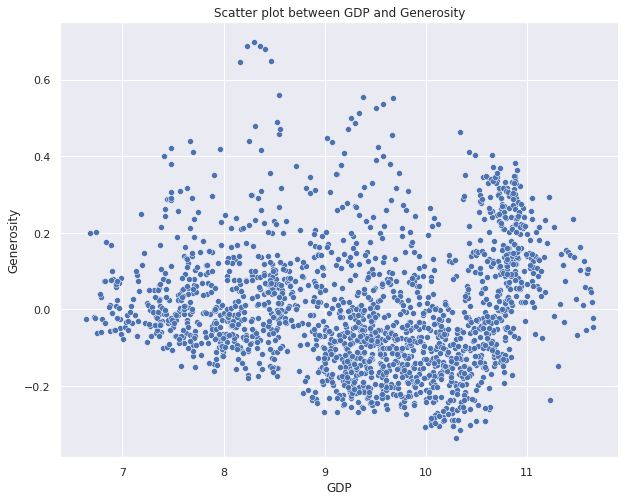

In [19]:
# GDP ; Generosidade (aparentemente sem correlacao)
ax = sns.scatterplot(data=whr,x="GDP",y="Generosity");
ax.set_title("Scatter plot between GDP and Generosity");

### Gráfico de Colunas

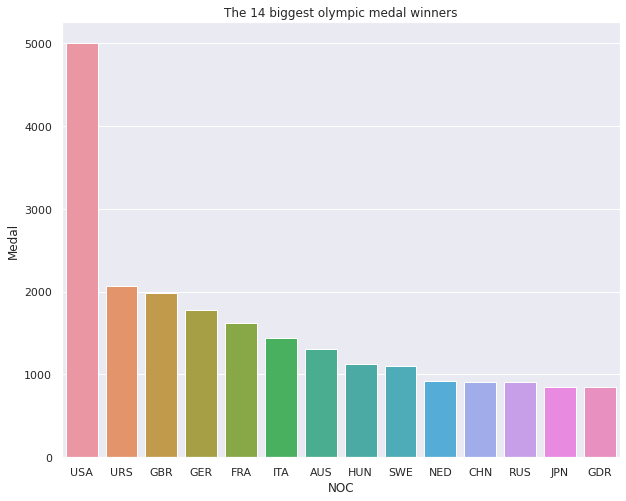

In [20]:
# Histograma país e medalhas


medals_per_country = pd.read_csv("https://raw.githubusercontent.com/caiochacon/projeto_final_ICD/main/datasets/olimpic/depoisde2016.csv") # dataset com numero de medalhas por pais
medals_per_country = medals_per_country[medals_per_country["Medal"] > 800] # seleciona do dataset original somente os países com mais de 800 medalhas
medals_per_country.sort_values(by="Medal",ascending=False,inplace=True)

ax = sns.barplot(data = medals_per_country,x="NOC",y="Medal");
ax.set_title("The 14 biggest olympic medal winners");

### Gráfico de Linhas

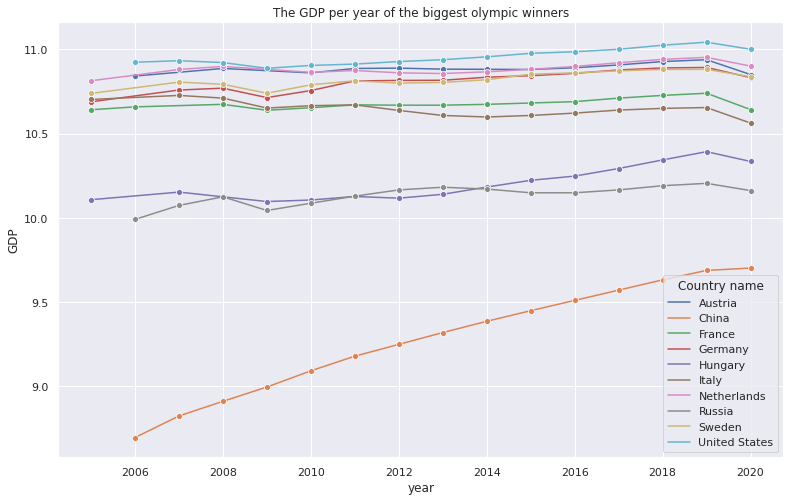

In [21]:
# Grafico de linhas com PIB no decorrer do tempo dos países com mais de 800 medalhas
countries_used = ["United States","Russia","England","Germany","France","Italy","Austria",
                  "Hungary","Sweden","Netherlands","China"]
whr_gpd_over_time = whr[whr["Country name"].isin(countries_used)]

sns.set(rc={'figure.figsize':(13,8)})
ax = sns.lineplot(data = whr_gpd_over_time,x="year",y="GDP",hue="Country name",marker="o");
ax.set_title("The GDP per year of the biggest olympic winners");